In [1]:
import pickle
import numpy as np

file_path = "../data/raw/s01.dat"

with open(file_path, "rb") as f:
    data = pickle.load(f, encoding="latin1")

print("Keys:", data.keys())
print("Data shape:", data["data"].shape)
print("Labels shape:", data["labels"].shape)


Keys: dict_keys(['labels', 'data'])
Data shape: (40, 40, 8064)
Labels shape: (40, 4)


In [2]:
eeg_data = data["data"][:, :32, :]

print("EEG shape:", eeg_data.shape)


EEG shape: (40, 32, 8064)


In [3]:
valence = data["labels"][:, 0]
arousal = data["labels"][:, 1]

cognitive_labels = []

for v, a in zip(valence, arousal):
    if v >= 5 and a >= 5:
        cognitive_labels.append(0)   # Focused
    elif v < 5 and a >= 5:
        cognitive_labels.append(1)   # Stress
    elif v >= 5 and a < 5:
        cognitive_labels.append(2)   # Relaxed
    else:
        cognitive_labels.append(3)   # Fatigue

cognitive_labels = np.array(cognitive_labels)

print("Labels:", cognitive_labels)


Labels: [0 0 0 1 2 2 2 2 3 3 3 3 3 3 1 0 1 0 0 0 0 2 2 0 0 0 0 3 3 3 1 1 3 1 1 1 1
 1 1 0]


Matplotlib is building the font cache; this may take a moment.


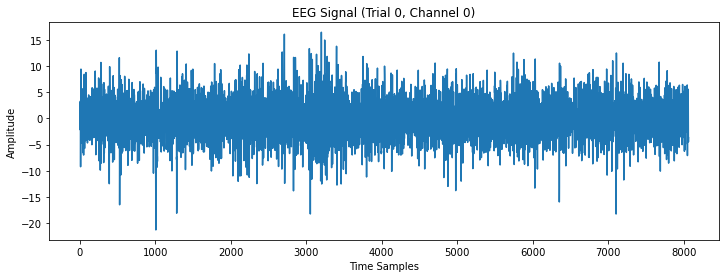

In [4]:
import matplotlib.pyplot as plt

trial = 0
channel = 0

signal = eeg_data[trial, channel]

plt.figure(figsize=(12,4))
plt.plot(signal)
plt.title("EEG Signal (Trial 0, Channel 0)")
plt.xlabel("Time Samples")
plt.ylabel("Amplitude")
plt.show()


The above graph basically shows the electrical activity of neurons firing inside the brain. EEG electrodes measures the tiny voltage changes on the scalp caused by synchronized neuron activity.
Typical EEG range:
±5 to ±100 µV
Our graph showing:
-20 to +15

In [5]:
np.save("../data/processed/eeg.npy", eeg_data)
np.save("../data/processed/labels.npy", cognitive_labels)


In [ ]:
from scipy.signal import butter, filtfilt
#butter()
#Creates filter coefficients.
#filtfilt()
#Applies filter forward + backward, prevents phase shift